# Redistributions

## Setup

In [ ]:
%load_ext autoreload
%autoreload 2
import torch
import tensorcraft as tc
import matplotlib
import matplotlib.pyplot as plt
import logging
log = logging.getLogger("tensorcraft")
log.setLevel("INFO")

06-03-2025 04:52:16 : INFO : compiler : __init__ -- Grammar file loaded successfully.
06-03-2025 04:52:16 : INFO : compiler : __init__ -- Parser object created successfully.


In [ ]:
LATEX_WIDTH = 517.935  # Doc
# LATEX_WIDTH = 444.14774 # Doc


figSize = tc.viz.latex2figSize(LATEX_WIDTH, fraction=0.5, ratio=1)
fontsize = 10
fontsize_small = 8

matplotlib.rcParams.update(
    {
        "figure.figsize": figSize,
        "figure.dpi": 100,
        # "figure.autolayout": True,
        "text.usetex": True,
        "font.family": "serif",
        "font.size": fontsize,
        "axes.labelsize": fontsize_small,
        "legend.fontsize": fontsize_small,
        "xtick.labelsize": fontsize_small,
        "ytick.labelsize": fontsize_small,
    }
)

## Split

D_[2,2]⊥{0,∅}(4,∅)


<Figure size 358.333x358.333 with 0 Axes>

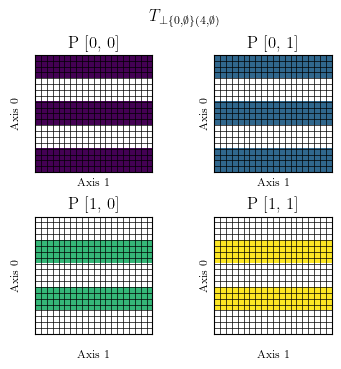

In [ ]:
fig = plt.figure(layout='constrained')

tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), 4)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)
fig.suptitle(dist.latexStr())
plt.savefig("plots/split_example_start.pdf")

D_[2,2]⊥{(1,0),∅}(4,∅)
$T_{\perp\{ (1,0),\emptyset \}(4,\emptyset)}$
D_[2,2]⊥{(0,1),∅}(2,∅)
D_[2,2]⊥{0,1}(4,2)


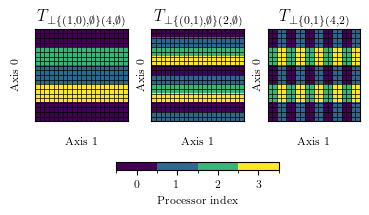

In [ ]:
fig = plt.figure(layout='constrained')
grid = fig.add_gridspec(1, 3)
axs = grid.subplots(
    sharey=True,
)

new_dist, comm_vol, n_procs = dist.split(tensor_shape, tensor_axis=0, mesh_dims=1, block_size=2)
print(new_dist)
tc.viz.draw_2d_tensor(axs[0], tensor_shape, new_dist)
print(new_dist.latexStr())
axs[0].set_title(new_dist.latexStr())

new_dist, comm_vol, n_procs = dist.split(tensor_shape, tensor_axis=0, mesh_dims=1, block_size=2, minor=True)
print(new_dist)
tc.viz.draw_2d_tensor(axs[1], tensor_shape, new_dist)
axs[1].set_title(new_dist.latexStr())

new_dist, comm_vol, n_procs = dist.split(tensor_shape, tensor_axis=1, mesh_dims=1, block_size=2)
print(new_dist)
tc.viz.draw_2d_tensor(axs[2], tensor_shape, new_dist)
axs[2].set_title(new_dist.latexStr())

tc.viz.draw_color_bar(fig, axs, tc.viz.get_n_colors(dist.numProcessors), orientation="horizontal", shrink=0.5)

plt.savefig("plots/split_example_end.pdf")

## AllGather

D_[2,2,2]⊥{(0,1),2}(1,1)


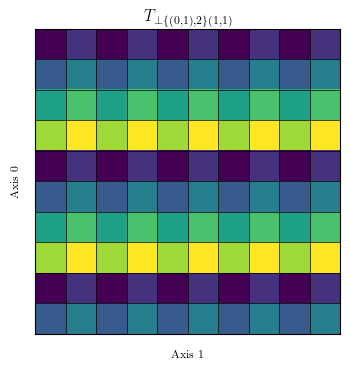

In [ ]:
tensor_shape = torch.Size([10, 10])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (2,)), 1)
print(dist)
fig = plt.figure(layout='constrained')
axs = fig.add_subplot(111)
tc.viz.draw_2d_tensor(axs, tensor_shape, dist)
axs.set_title(dist.latexStr())
plt.savefig("plots/allgather_example_start.pdf")

### Mesh axis 0

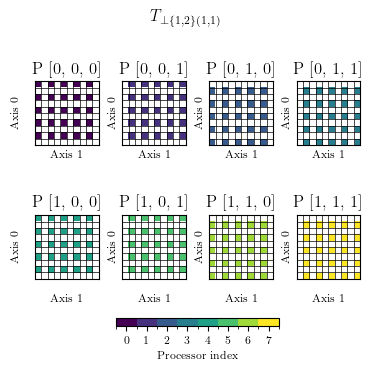

In [ ]:
new_dist, comm_vol, n_procs = dist.allgather(tensor_shape, gather_dim=0)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist, cbar=True)
fig.suptitle(new_dist.latexStr())
plt.savefig("plots/allgather_example_gather_0.pdf")

### Mesh Axis 1

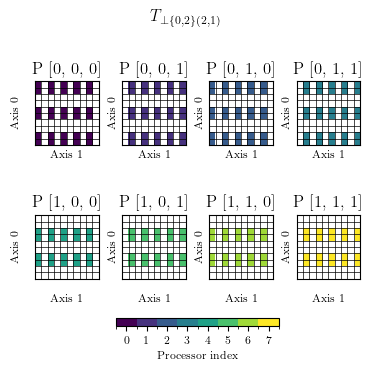

In [ ]:
new_dist, comm_vol, n_procs = dist.allgather(tensor_shape, gather_dim=1)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist, cbar=True)
fig.suptitle(new_dist.latexStr())
plt.savefig("plots/allgather_example_gather_1.pdf")

### Mesh Axis 2

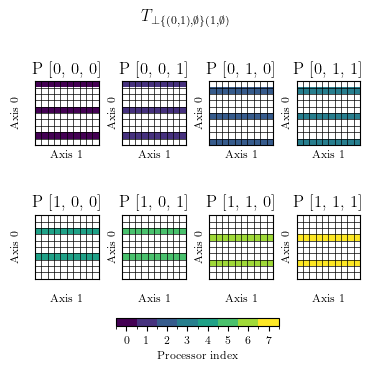

In [ ]:
new_dist, comm_vol, n_procs = dist.allgather(tensor_shape, gather_dim=2)

fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist,cbar=True)
fig.suptitle(new_dist.latexStr())
plt.savefig("plots/allgather_example_gather_2.pdf")

## Split

D_[2,2,2]⊥{∅,∅}(∅,∅)


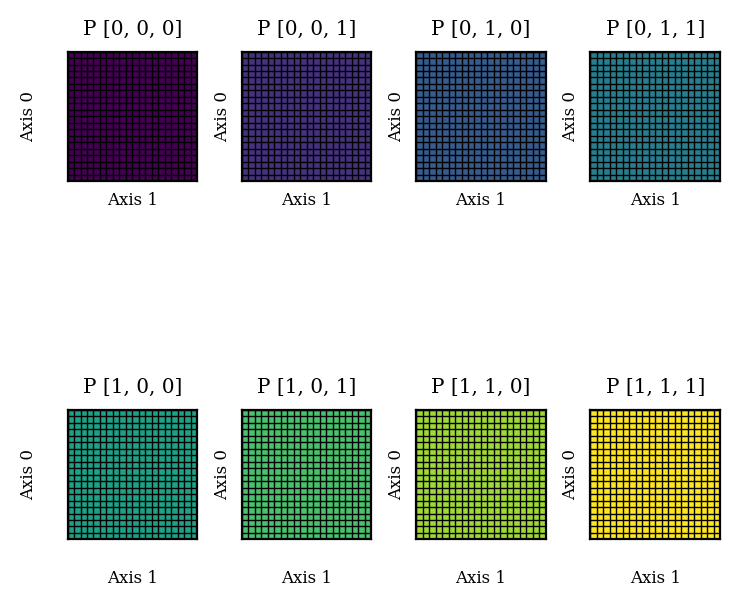

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((), ()), 1)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

0 0


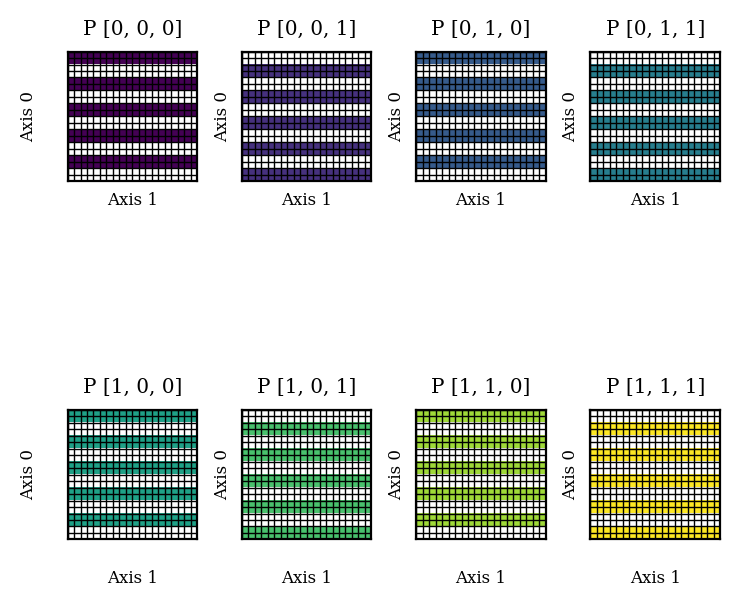

In [ ]:
new_dist, comm_vol, n_procs = dist.split(tensor_shape, tensor_axis=0, mesh_dims=2, block_size=2)
print(comm_vol, n_procs)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)


0 0


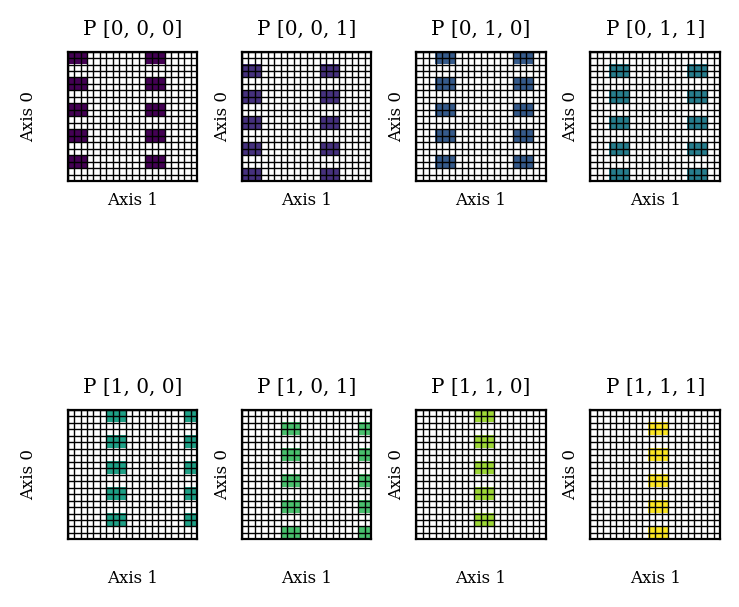

In [ ]:
new_new_dist, comm_vol, n_procs = new_dist.split(tensor_shape, tensor_axis=1, mesh_dims=(0,1), block_size=3)
print(comm_vol, n_procs)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_new_dist)

0 0
D_[2,2,2]⊥{(0,1,2),∅}(2,∅)


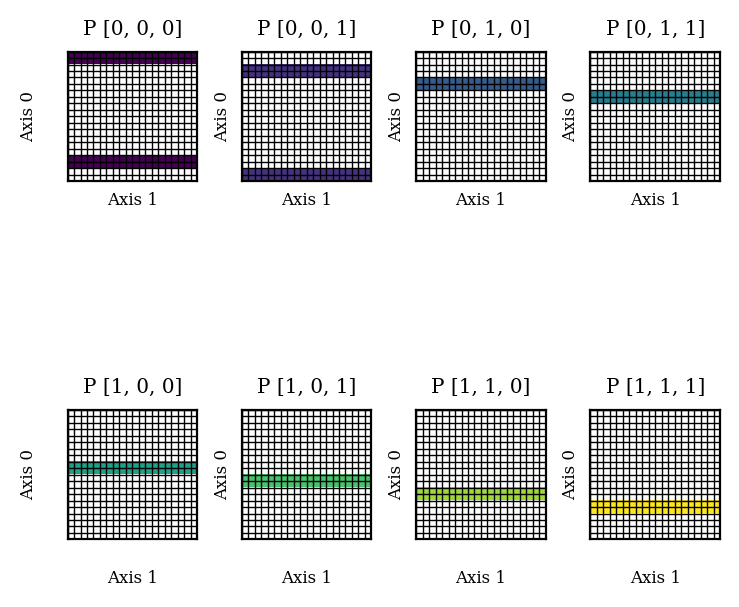

In [ ]:
new_new_dist, comm_vol, n_procs = new_dist.split(tensor_shape, tensor_axis=0, mesh_dims=(0,1), block_size=1)
print(comm_vol, n_procs)
print(new_new_dist)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_new_dist)

## All2All

D_[2,2,2]⊥{0,∅}(10,∅)


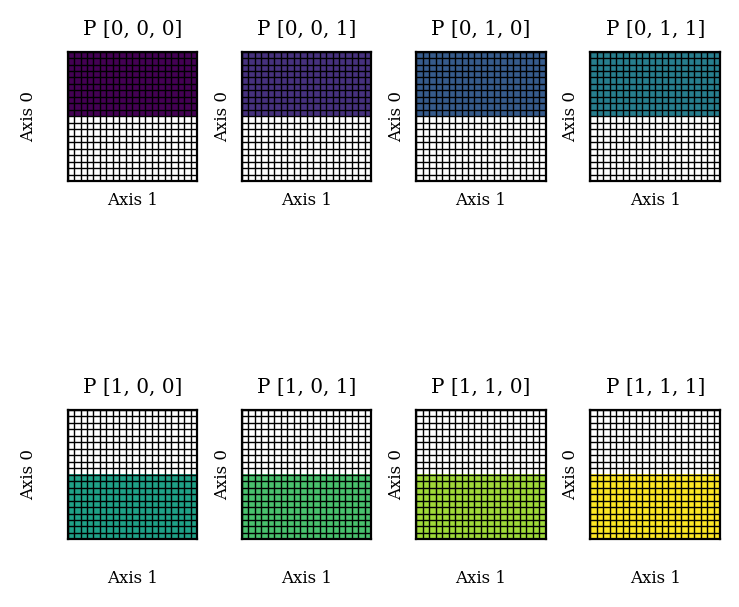

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), 10)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

D_[2,2,2]⊥{∅,0}(∅,10)
200 2


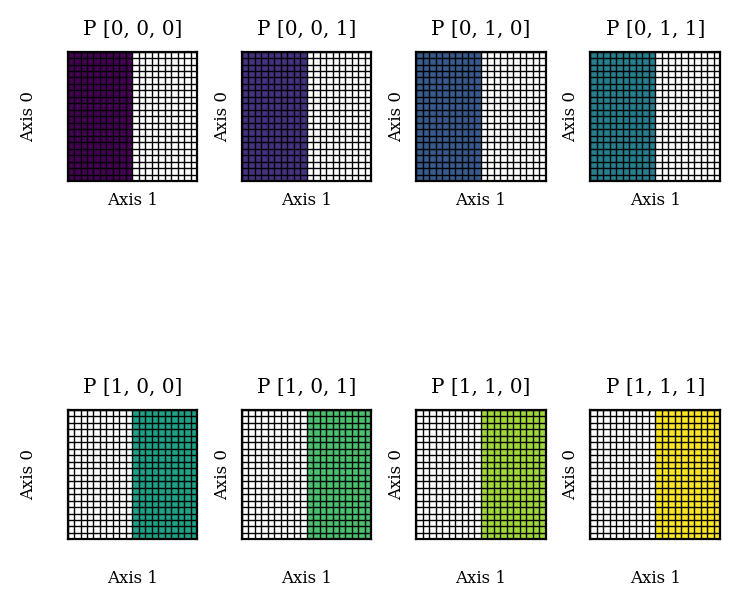

In [ ]:
new_dist, comm_vol, n_procs = dist.alltoall(tensor_shape, 0, 1)
print(new_dist)
print(comm_vol, n_procs)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

D_[3,2,2]⊥{(0,1),2}(1,4)


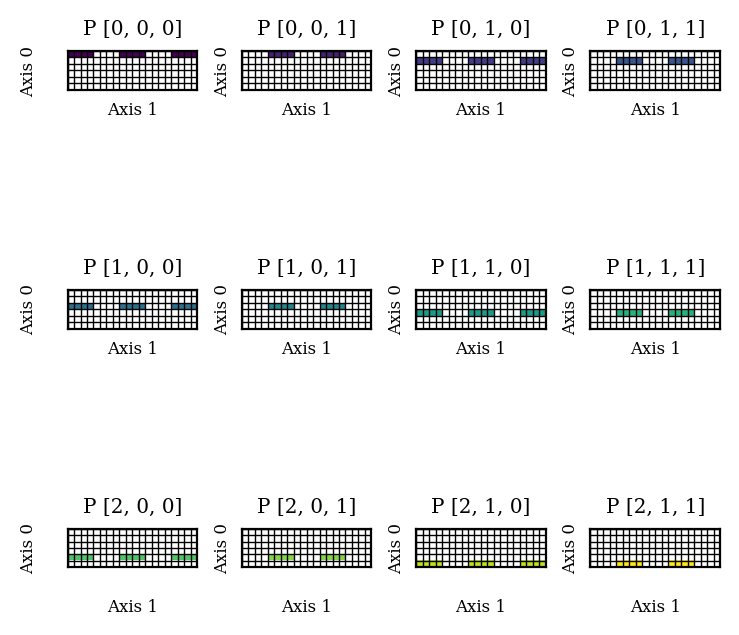

In [ ]:
tensor_shape = torch.Size([6, 20])
mesh = torch.Size([3,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (2,)), (1,4))
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

D_[2,2,2]⊥{(0,1),2}(2,2)


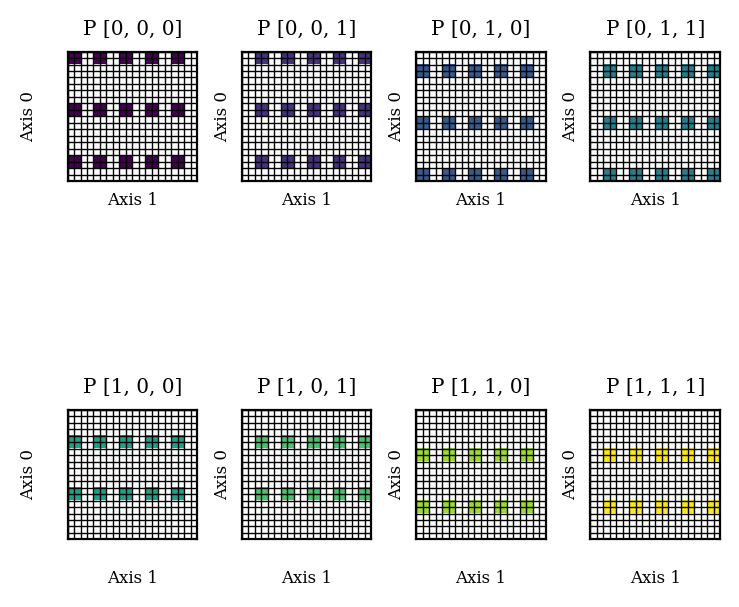

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), (2,)), (2,2))
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

D_[2,2,2]⊥{1,(2,0)}(2,1)


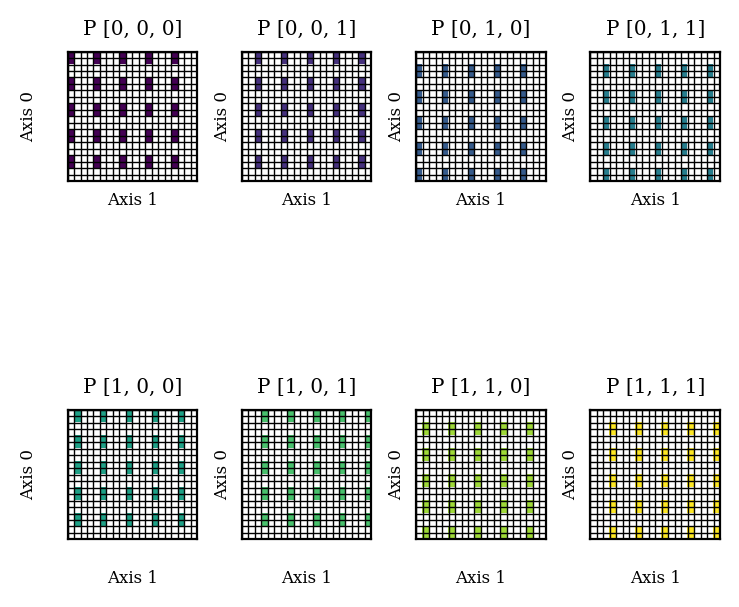

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2,2])
dist = tc.dist.MultiAxisDist(mesh, ((1,), (2,0)), (2,1))
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

## Permute

D_[3,3]⊥{(0,1),∅}(2,∅)


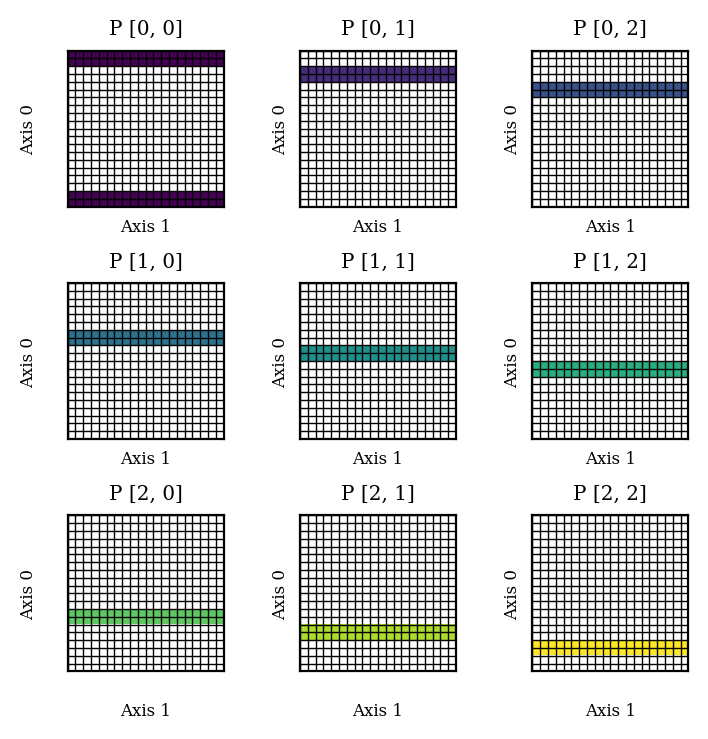

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([3,3])
dist = tc.dist.MultiAxisDist(mesh, ((0,1), ()), 2)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)

D_[3,3]⊥{(1,0),∅}(2,∅)
80 2


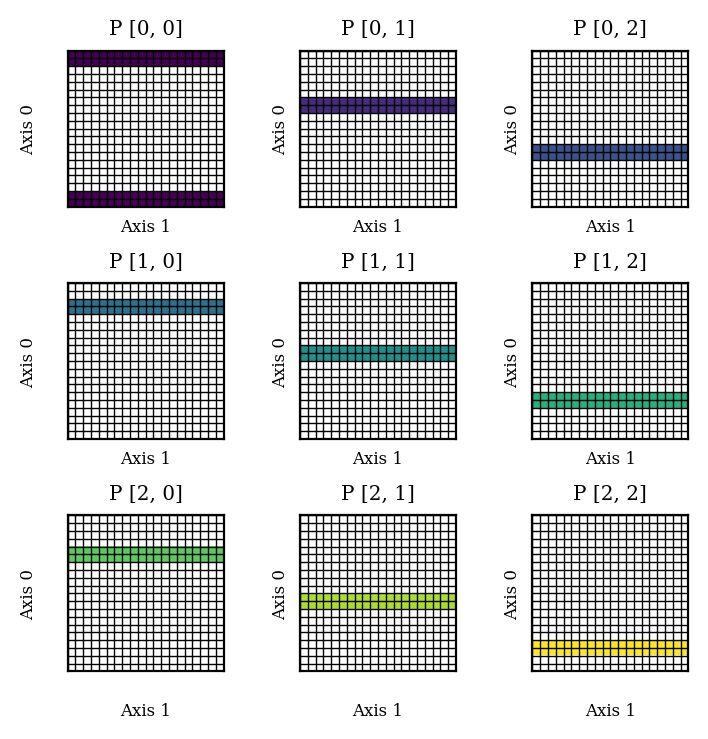

In [ ]:
new_dist, comm_vol, n_procs = dist.permute(tensor_shape, [0,1])
print(new_dist)
print(comm_vol, n_procs)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist)

D_[2,2]⊥{0,∅}(1,∅)


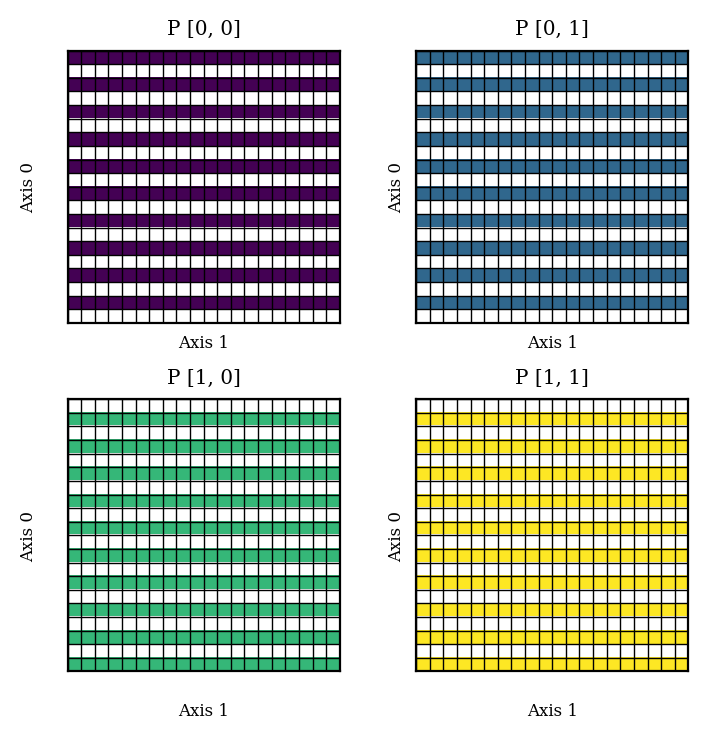

In [ ]:
tensor_shape = torch.Size([20, 20])
mesh = torch.Size([2,2])
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), 1)
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)